# Как численно взять производную первого порядка?

## Вариант 14

Так как производная у нас по определению

$$
\lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

то приблизительно посчитать мы её можем по формуле

$$
\frac{f(x+h) - f(x)}{h}
$$

Для оценки погрешности разложим функцию в ряд Тейлора

Многочлен Тейлора функции $ f(x) $ в точке $a$

$$ f(x) = \sum_{n=0}^k \frac{f^{(n)}(a)}{n!} (x-a)^n = f(a) + f^{(1)}(a)(x-a) + \frac{f^{2}(a)}{2!}(x-a)^2 
+ \dots + \frac{f^{(n)(a)}}{k!}(x-a)^k$$

Рассмотрим его в точке h

$$ f(x) = \sum_{n=0}^k \frac{f^{(n)}(h)}{n!} (x-h)^n = f(h) + f^{(1)}(h)(x-h) + \frac{f^{2}(h)}{2!}(x-h)^2 
+ \dots + \frac{f^{(n)(h)}}{k!}(x-h)^k$$

Сделаем замену 
$$x = x+h$$

(вместо $x$ напишем $x+h$)

$$ f(x+h) = \sum_{n=0}^{k} \frac{f^{(n)}(x)}{n!} (h)^n =  f(h) + f^{(1)}(x)(h) + \frac{f^{2}(x)}{2!}(h)^2 
+ \dots + \frac{f^{(k)}(x)}{k!}(h)^k $$

Перенесем $f(x)$ в левую часть и разделим на $h$

$$
\begin{equation}
\frac{f(x+h) - f(h)}{h}  = f^{(1)}(x) + \frac{h}{2}f^{(2)}(x) + \frac{h^2}{6}f^{(3)}(x) + \dots \tag{*}
\end{equation}
$$

То есть разница между приближённым и точным значением определяется производными высших порядков.

Чем меньше $ h $, тем меньше вклад этих членов и ошибка усечения $ \delta_t $ уменьшается

$$ \delta_t = \left | \frac{h}{2}f^{(2)}(x) + \frac{h^2}{6}f^{(3)}(x) + \dots \right|$$

Но с другой стороны при маленьких $h$ увеличивается погрешность вычисления $f(x+h) - f(h)$ и ошибка округления $ \delta_r $ увеличивается

#### __Суммарная ошибка будет наименьшей при__ $ \delta_r \approx \delta_t $

## Как повысить точность?

1)Более точно вычислять значения функции (использовать более типы переменных с большей точнстью)

2)Использовать формулу, обладающую меньше ошибкой усечения

Мы будем использовать второй способ

Например, есть такая формула

$$ \frac{df(x)}{dx} = \frac{f(x+h)-f(x-h)}{2h} $$

### __Определение__

__Порядок точности__ формулы численного дифференцирования - это максимальная степень многолчена, для которого формула даёт точный результат. 

Например в правой части формулы (*) кроме первой производной есть ещё производные порядков 2 и выше. Следовательно, порядок точности формулы численного дифференцирования равен 1, так как производные высших порядков для многочлена степени 1 равны 0, то есть формула будет давать более _точный_ результат, чем для многочленов большей степени

# Практика

Найдём производную функции 
$$ f(x) = x e^{-x^2} $$
в точках $x \in [0.5, 1, 1.5, 2]$


In [71]:
import numpy as np

#Наша функция
def func(x):
    '''
    Рассчёт значения функции в точке
    '''
    return x * np.exp(-x**2)
    

def df_dx_2(x, h=0.001):
    '''
    Рассчёт значения производной в точке
    2 порядок точности
    '''
    return (func(x+h) - func(x-h)) / (2*h)


eps = 2.22044605 * 10 **(-16)

def delta_2(x, h=0.001):
    '''
    Рассчёт абсолютной погрешности производной в точке
    '''
    answer = eps * np.abs(func(x)) / h
    return answer

def df_dx_4(x, h=0.001):
    '''
    Рассчёт значения производной в точке
    4 порядок точности (вывод формулы не приводится)
    '''
    return (func(x-2*h) - 8*func(x-h) + 8 * func(x+h) - func(x + 2*h)) / (12 * h)


def delta_4(x, h=0.001):
    '''
    Рассчёт абсолютной погрешности производной в точке
    (для формулы 4 порядка)
    '''
    return 3 * eps * np.abs(func(x)) / 2 * h

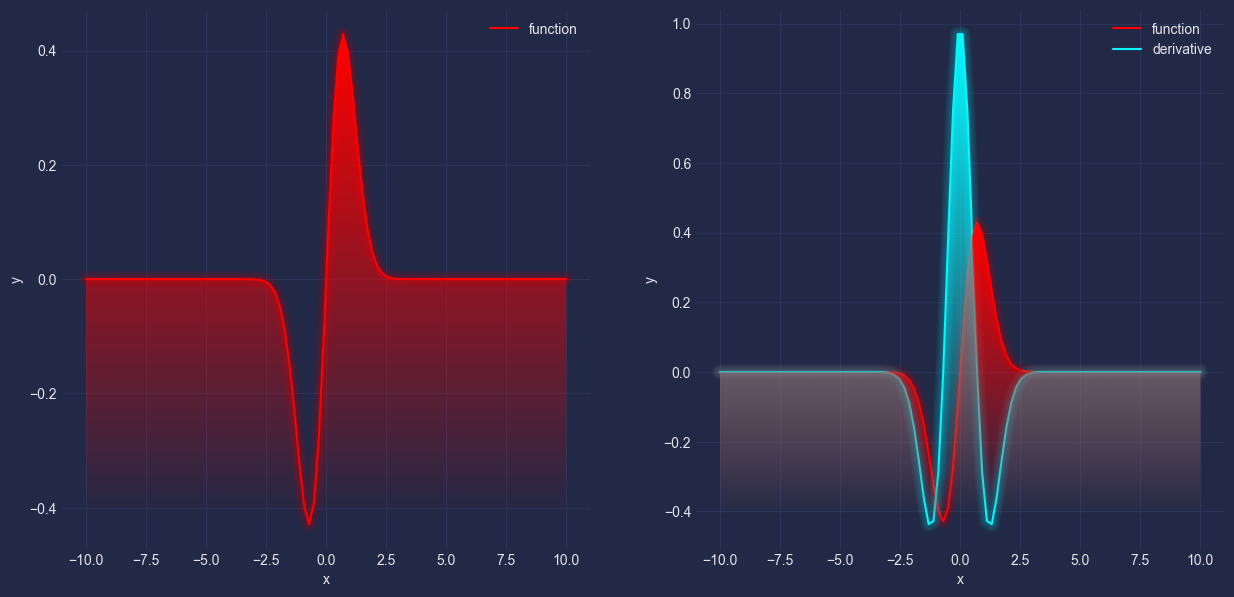

In [105]:
import matplotlib.pyplot as plt
import numpy as np

import mplcyberpunk #Красивая библиотека. Добавляем эту строчку

plt.style.use("cyberpunk") #И эту 

X = np.linspace(-10, 10, 100)
Y = func(X)
Y1 = df_dx_2(X)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7))

axs[0].plot(X, Y, 'r', label='function')
axs[0].legend()
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].plot(X, Y, 'r', label='function')
axs[1].plot(X, Y1, label='derivative')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()

#И эти две
mplcyberpunk.add_glow_effects(axs[0], gradient_fill=True) 
mplcyberpunk.add_glow_effects(axs[1], gradient_fill=True) 

plt.show()


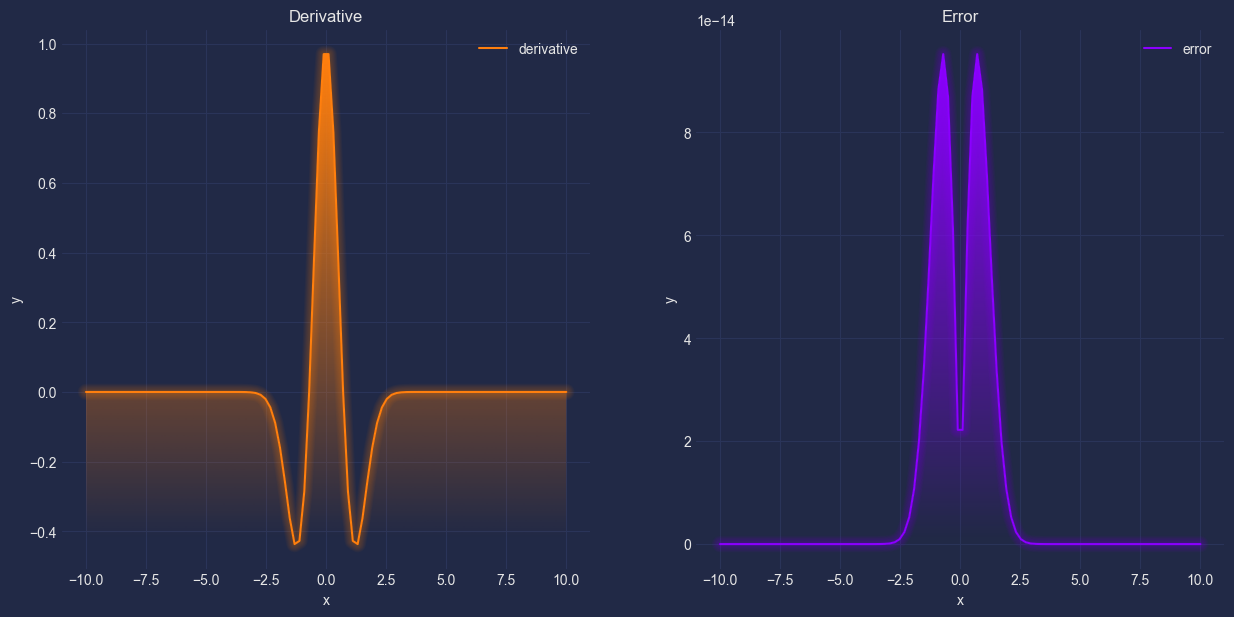

In [72]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,7))


axs[0].plot(X, Y1, color = '#ff7f0e', label='derivative')
axs[0].legend()
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].set_title('Derivative')

mplcyberpunk.add_glow_effects(axs[0], gradient_fill=True)

Y2 = delta_2(X)
axs[1].plot(X, Y2, color = '#8B00FF', label='error')
axs[1].legend()
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].set_title('Error')
mplcyberpunk.add_glow_effects(axs[1], gradient_fill=True)



plt.show()

## Проблема. Какой h нам выбрать?

Оценим h из формулы

$$
\delta_r \approx \delta_t
$$

то есть

$$
\frac{\epsilon \left | f(x) \right | }{h}  = \left| \frac{h^2}{6} f^{(3)} (x) + \frac{h^4}{120} f^{(5)} (x) \right|
$$

Решим уравнение численно относительно h

Третью и пятую производные возьмём аналитически 

In [73]:
import sympy as sp

x1 = sp.Symbol('x') 
y = x1 * sp.exp(-x1**2) #зададим функцию


dy_2 = sp.diff(y, x1, 3).subs(x1, 0.5) #Производная 3 порядка в точке 0.5
dy_5 = sp.diff(y, x1, 5).subs(x1, 0.5) #Производная 5 порядка в точке 0.5

In [77]:
# Определение переменных и констант
h = sp.Symbol('h')

# Определение уравнения
eq = sp.Eq(eps / h * sp.Abs(func(0.5)), sp.Abs(h**2 * dy_2 / 6  +   h**4 * dy_5 / 120))

# Решение уравнения численно
h_0 = sp.nsolve(eq, h, 10**(-3)) # 10**(-3) – начальное приближение корня

# Вывод решения
h_0

1.10034909849510e-5

### Берём производные с использованием формулы 2-го порядка точности

In [81]:
X_values = [0.5, 1, 1.5, 2]

H_values = [10**(-3), 10**(-4), 1.1*10**(-5), 10**(-6), 10**(-7)] #Точность, с которой будем считать


vals_3 = []
for x_i in X_values:
    vals_3.append(
                df_dx_2(x_i, h=10**(-3))
                 )

vals_4 = []
for x_i in X_values:
    vals_4.append(
                df_dx_2(x_i, h=10**(-4))
                 )

vals_5 = []
for x_i in X_values:
    vals_5.append(
                df_dx_2(x_i, h=1.1*10**(-5))
                 )

vals_6 = []
for x_i in X_values:
    vals_6.append(
                df_dx_2(x_i, h=10**(-6))
                 )

vals_7 = []
for x_i in X_values:
    vals_7.append(
                df_dx_2(x_i, h=10**(-7))
                 )

val_analitic = []

for i in X_values:
    val_analitic.append(
                        (lambda x: (1-2*x**2)*np.exp(-x**2))(i) #Аналитическое выражение для производной
                        )


print(val_analitic)

[0.38940039153570244, -0.36787944117144233, -0.36889728596652516, -0.12820947222113926]


In [59]:
import pandas as pd

df2 = pd.DataFrame({'analitic': val_analitic,
                    'e-3': vals_3, 
                    'e-4': vals_4,
                    'e-5': vals_5,
                    'e-6': vals_6,
                    'e-7': vals_7},
                    index=[0.5, 1, 1.5, 2])

df2

,analitic,e-3,e-4,e-5,e-6,e-7
0.5,0.389400,0.389400,0.389400,0.389400,0.389400,0.389400
1.0,-0.367879,-0.367879,-0.367879,-0.367879,-0.367879,-0.367879
1.5,-0.368897,-0.368897,-0.368897,-0.368897,-0.368897,-0.368897
2.0,-0.128209,-0.128210,-0.128209,-0.128209,-0.128209,-0.128209


In [60]:
df2['Error3'] = np.abs(df2['analitic'] - df2['e-3'])
df2['Error4'] = np.abs(df2['analitic'] - df2['e-4'])
df2['Error5'] = np.abs(df2['analitic'] - df2['e-5'])
df2['Error6'] = np.abs(df2['analitic'] - df2['e-6'])
df2['Error7'] = np.abs(df2['analitic'] - df2['e-7'])

df2

,analitic,e-3,e-4,e-5,e-6,e-7,Error3,Error4,Error5,Error6,Error7
0.5,0.389400,0.389400,0.389400,0.389400,0.389400,0.389400,6.490017e-08,6.490619e-10,5.536294e-12,3.483552e-11,1.181023e-10
1.0,-0.367879,-0.367879,-0.367879,-0.367879,-0.367879,-0.367879,6.131322e-07,6.131645e-09,7.209822e-11,1.621503e-11,9.480727e-11
1.5,-0.368897,-0.368897,-0.368897,-0.368897,-0.368897,-0.368897,1.317492e-07,1.317547e-09,1.711020e-11,3.981926e-11,2.238587e-10
2.0,-0.128209,-0.128210,-0.128209,-0.128209,-0.128209,-0.128209,1.159990e-07,1.160143e-09,1.525752e-11,8.634038e-12,1.197355e-10


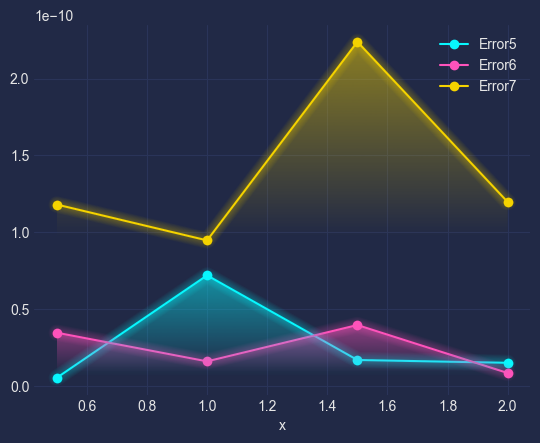

In [98]:
#plt.plot(X_values, df2['Error4'], label='Error4')
plt.plot(X_values, df2['Error5'], label='Error5', marker='o')
plt.plot(X_values, df2['Error6'], label='Error6', marker='o')
plt.plot(X_values, df2['Error7'], label='Error7', marker='o')
plt.xlabel('x')
plt.legend()
mplcyberpunk.make_lines_glow()
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.5)
plt.show()

## Теперь возьмём производную с большей точностью

$$
f^{\prime} (x) = \frac{f(x-2h) - 8f(x-h)+ 8f(x+h) - f(x+2h)}{12h}
$$

In [62]:
X_values = [0.5, 1, 1.5, 2]

H_values = [10**(-3), 10**(-4), 1.1*10**(-5), 10**(-6), 10**(-7)] #Точность, с которой будем считать


vals_3 = []
for x_i in X_values:
    vals_3.append(
                df_dx_4(x_i, h=10**(-3))
                 )

vals_4 = []
for x_i in X_values:
    vals_4.append(
                df_dx_4(x_i, h=10**(-4))
                 )

vals_5 = []
for x_i in X_values:
    vals_5.append(
                df_dx_4(x_i, h=1.1*10**(-5))
                 )

vals_6 = []
for x_i in X_values:
    vals_6.append(
                df_dx_4(x_i, h=10**(-6))
                 )

vals_7 = []
for x_i in X_values:
    vals_7.append(
                df_dx_4(x_i, h=10**(-7))
                 )

val_analitic = []

for i in X_values:
    val_analitic.append(
                        (lambda x: (1-2*x**2)*np.exp(-x**2))(i) #Аналитическое выражение для производной
                        )


print(val_analitic)



df4 = pd.DataFrame({'analitic': val_analitic,
                    'e-3': vals_3, 
                    'e-4': vals_4,
                    'e-5': vals_5,
                    'e-6': vals_6,
                    'e-7': vals_7},
                    index=[0.5, 1, 1.5, 2])

df4['Error3'] = np.abs(df4['analitic'] - df4['e-3'])
df4['Error4'] = np.abs(df4['analitic'] - df4['e-4'])
df4['Error5'] = np.abs(df4['analitic'] - df4['e-5'])
df4['Error6'] = np.abs(df4['analitic'] - df4['e-6'])
df4['Error7'] = np.abs(df4['analitic'] - df4['e-7'])

df4

[0.38940039153570244, -0.36787944117144233, -0.36889728596652516, -0.12820947222113926]


,analitic,e-3,e-4,e-5,e-6,e-7,Error3,Error4,Error5,Error6,Error7
0.5,0.389400,0.389400,0.389400,0.389400,0.389400,0.389400,3.908540e-13,1.365574e-13,3.715583e-12,6.259110e-11,2.106209e-10
1.0,-0.367879,-0.367879,-0.367879,-0.367879,-0.367879,-0.367879,1.183109e-12,4.383716e-13,3.178291e-12,6.963152e-12,2.288669e-12
1.5,-0.368897,-0.368897,-0.368897,-0.368897,-0.368897,-0.368897,2.990941e-13,1.519340e-13,4.988787e-13,4.675815e-11,4.551552e-10
2.0,-0.128209,-0.128209,-0.128209,-0.128209,-0.128209,-0.128209,2.350897e-13,2.206291e-13,1.484868e-12,1.152525e-11,1.428651e-10


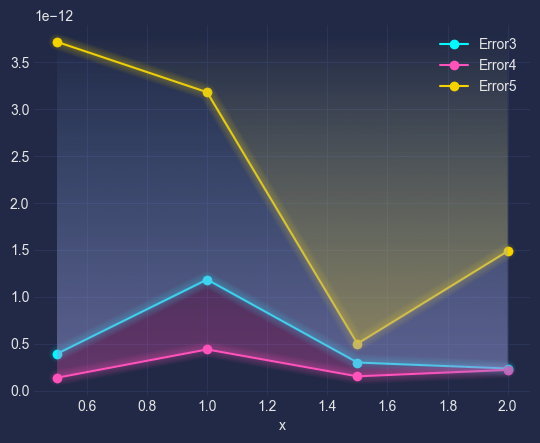

In [101]:
plt.plot(X_values, df4['Error3'], label='Error3', marker='o')
plt.plot(X_values, df4['Error4'], label='Error4', marker='o')
plt.plot(X_values, df4['Error5'], label='Error5', marker='o')
#plt.plot(X_values, df4['Error6'], label='Error6', marker='o')
#plt.plot(X_values, df4['Error7'], label='Error7', marker='o')
plt.xlabel('x')
plt.legend()
mplcyberpunk.make_lines_glow()
mplcyberpunk.add_gradient_fill(alpha_gradientglow=0.3, gradient_start='top')
plt.show()

Построим теперь ошибки, полученные по первой формуле при $ h \in \{ 10^{-5}, 10^{-6}, 10^{-7} \}$

и полученные по второй формуле при $ h \in \{ 10^{-3}, 10^{-4}, 10^{-5} \} $

Посмотрим, в каком случае получился самый точный результат

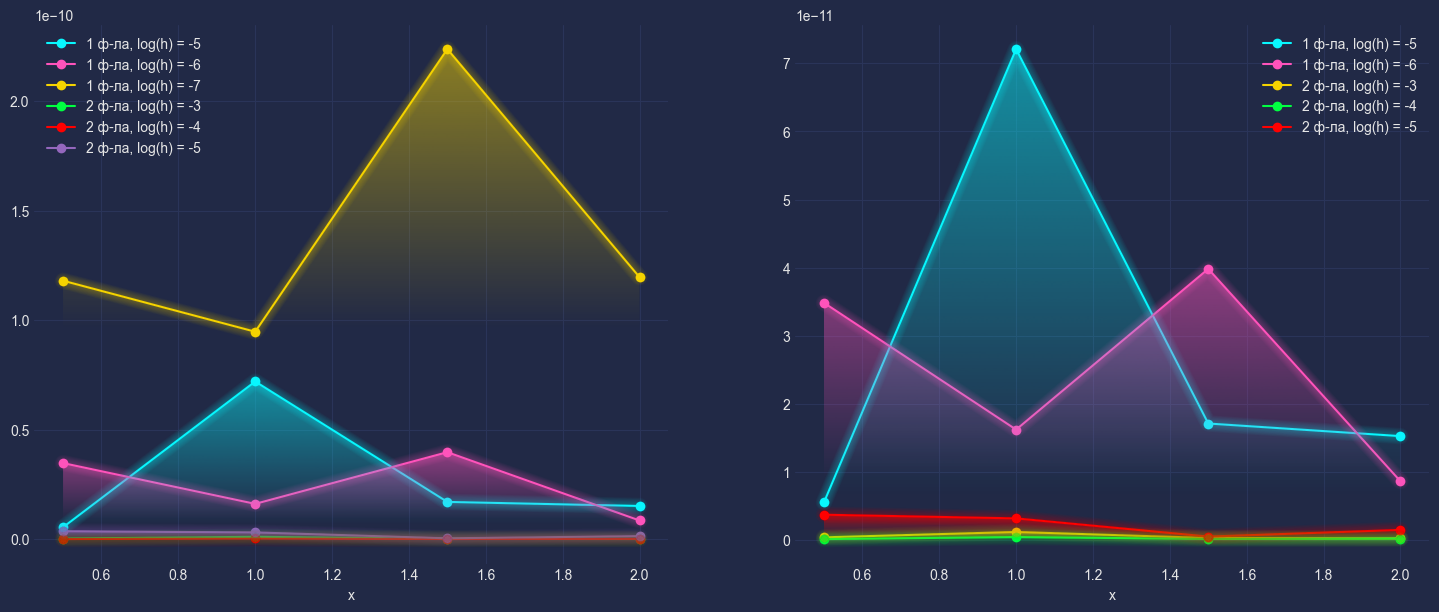

In [64]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(18,7))


axs[0].plot(X_values, df2['Error5'], label='1 ф-ла, log(h) = -5', marker='o')
axs[0].plot(X_values, df2['Error6'], label='1 ф-ла, log(h) = -6', marker='o')
axs[0].plot(X_values, df2['Error7'], label='1 ф-ла, log(h) = -7', marker='o')

axs[0].plot(X_values, df4['Error3'], label='2 ф-ла, log(h) = -3', marker='o')
axs[0].plot(X_values, df4['Error4'], label='2 ф-ла, log(h) = -4', marker='o')
axs[0].plot(X_values, df4['Error5'], label='2 ф-ла, log(h) = -5', marker='o')
axs[0].legend()
axs[0].set_xlabel('x')

mplcyberpunk.make_lines_glow(axs[0])
mplcyberpunk.add_gradient_fill(axs[0], alpha_gradientglow=0.5)

axs[1].plot(X_values, df2['Error5'], label='1 ф-ла, log(h) = -5', marker='o')
axs[1].plot(X_values, df2['Error6'], label='1 ф-ла, log(h) = -6', marker='o')
#axs[1].plot(X_values, df2['Error7'], label='1 ф-ла, log(h) = -7', marker='o')

axs[1].plot(X_values, df4['Error3'], label='2 ф-ла, log(h) = -3', marker='o')
axs[1].plot(X_values, df4['Error4'], label='2 ф-ла, log(h) = -4', marker='o')
axs[1].plot(X_values, df4['Error5'], label='2 ф-ла, log(h) = -5', marker='o')
axs[1].legend()
axs[1].set_xlabel('x')

mplcyberpunk.make_lines_glow(axs[1])
mplcyberpunk.add_gradient_fill(axs[1], alpha_gradientglow=0.5)



plt.show()

## Вывод
Как легко видеть, формула для дифференцирования 4 порядка точности даёт лучший результат.


__Причем для для формулы четвёртого порядка точности лучше использовать большие значения h, чем для формулы второго порядка__